In [ ]:
mv /Rs.10/10_original_IMG*     /1Hundrednote/Real/

In [ ]:
cp /Rs.10 /Rs.10_Fake

In [ ]:
!ls /content/

 model	 sample_data   Test  'Test (2).zip'   Train


In [32]:
!mkdir '/content/Train'

In [31]:
# !rm -rf '/content/Train'

In [ ]:
!mv '/content/Train.zip' '/content/Train/'

In [61]:
!mkdir '/content/Test'

In [3]:
!mkdir '/content/model/'

In [ ]:
!mv '/content/Test.zip' '/content/Test/'

In [34]:
!unzip '/content/Train/Train.zip'

Archive:  /content/Train/Train.zip
   creating: Train/1Hundrednote_Fake/
  inflating: Train/1Hundrednote_Fake/13.jpg  
  inflating: Train/1Hundrednote_Fake/18.jpg  
  inflating: Train/1Hundrednote_Fake/21.jpg  
  inflating: Train/1Hundrednote_Fake/23.jpg  
  inflating: Train/1Hundrednote_Fake/24.jpg  
  inflating: Train/1Hundrednote_Fake/27.jpg  
  inflating: Train/1Hundrednote_Fake/28.jpg  
  inflating: Train/1Hundrednote_Fake/29.jpg  
   creating: Train/1Hundrednote_Real/
  inflating: Train/1Hundrednote_Real/1.jpg  
  inflating: Train/1Hundrednote_Real/10.jpg  
  inflating: Train/1Hundrednote_Real/11.jpg  
  inflating: Train/1Hundrednote_Real/2.jpg  
  inflating: Train/1Hundrednote_Real/20.jpg  
  inflating: Train/1Hundrednote_Real/22.jpg  
  inflating: Train/1Hundrednote_Real/25.jpg  
  inflating: Train/1Hundrednote_Real/3.jpg  
  inflating: Train/1Hundrednote_Real/30.jpg  
  inflating: Train/1Hundrednote_Real/4.jpg  
  inflating: Train/1Hundrednote_Real/5.jpg  
  inflating: Train/1

In [62]:
!unzip '/content/Test/Test.zip'

Archive:  /content/Test/Test.zip
   creating: Test/1Hundrednote_Fake/
  inflating: Test/1Hundrednote_Fake/1.jpg  
  inflating: Test/1Hundrednote_Fake/14.jpg  
  inflating: Test/1Hundrednote_Fake/15.jpg  
  inflating: Test/1Hundrednote_Fake/16.jpg  
  inflating: Test/1Hundrednote_Fake/2.jpg  
  inflating: Test/1Hundrednote_Fake/3.jpg  
   creating: Test/1Hundrednote_Real/
  inflating: Test/1Hundrednote_Real/1.jpg  
  inflating: Test/1Hundrednote_Real/14.jpg  
  inflating: Test/1Hundrednote_Real/15.jpg  
  inflating: Test/1Hundrednote_Real/16.jpg  
  inflating: Test/1Hundrednote_Real/2.jpg  
  inflating: Test/1Hundrednote_Real/3.jpg  
   creating: Test/2Hundrednote_Fake/
  inflating: Test/2Hundrednote_Fake/1.jpg  
  inflating: Test/2Hundrednote_Fake/2.jpg  
  inflating: Test/2Hundrednote_Fake/3.jpg  
  inflating: Test/2Hundrednote_Fake/31.jpg  
  inflating: Test/2Hundrednote_Fake/32.jpg  
  inflating: Test/2Hundrednote_Fake/33.jpg  
   creating: Test/2Hundrednote_Real/
  inflating: Test/

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import PIL
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator

In [63]:
ROOTPATH = '/content'
DATAPATH= ROOTPATH+'/Train'
TRAINPATH = ROOTPATH+'/Train'
TESTPATH =  ROOTPATH+'/Test'
MODELPATH = ROOTPATH+'/model/'

In [8]:
!ls /content/Train/

1Hundrednote  2Hundrednote  2Thousandnote  5Hundrednote  Fiftynote  Tennote  Twentynote


In [87]:
_1Hundrednote_Real=glob.glob(DATAPATH+'/1Hundrednote_Real/*')# [/content/Test/1Hundrednote/1.jpg,/content/Test/1Hundrednote/2.jpg]
_2Hundrednote_Real=glob.glob(DATAPATH+'/2Hundrednote_Real/*')
_2Thousandnote_Real=glob.glob(DATAPATH+'/2Thousandnote_Real/*')
_5Hundrednote_Real=glob.glob(DATAPATH+'/5Hundrednote_Real/*')
_Fiftynote_Real=glob.glob(DATAPATH+'/Fiftynote_Real/*')
_Tennote_Real=glob.glob(DATAPATH+'/Tennote_Real/*')
_Twentynote_Real=glob.glob(DATAPATH+'/Twentynote_Real/*')

_1Hundrednote_Fake=glob.glob(DATAPATH+'/1Hundrednote_Fake/*')# [/content/Test/1Hundrednote/1.jpg,/content/Test/1Hundrednote/2.jpg]
_2Hundrednote_Fake=glob.glob(DATAPATH+'/2Hundrednote_Fake/*')
_2Thousandnote_Fake=glob.glob(DATAPATH+'/2Thousandnote_Fake/*')
_5Hundrednote_Fake=glob.glob(DATAPATH+'/5Hundrednote_Fake/*')
_Fiftynote_Fake=glob.glob(DATAPATH+'/Fiftynote_Fake/*')
_Tennote_Fake=glob.glob(DATAPATH+'/Tennote_Fake/*')
_Twentynote_Fake=glob.glob(DATAPATH+'/Twentynote_Fake/*')

In [88]:
print(len(_1Hundrednote_Fake),_1Hundrednote_Fake)
print(len(_2Hundrednote_Fake),_2Hundrednote_Fake)
print(len(_2Thousandnote_Fake),_2Thousandnote_Fake)
print(len(_2Thousandnote_Fake),_2Thousandnote_Fake)
print(len(_5Hundrednote_Fake),_5Hundrednote_Fake)
print(len(_Fiftynote_Fake),_Fiftynote_Fake)
print(len(_Tennote_Fake),_Tennote_Fake)
print(len(_Twentynote_Fake),_Twentynote_Fake)
print(len(_1Hundrednote_Real),_1Hundrednote_Real)
print(len(_2Hundrednote_Real),_2Hundrednote_Real)
print(len(_2Thousandnote_Real),_2Thousandnote_Real)
print(len(_2Thousandnote_Real),_2Thousandnote_Real)
print(len(_5Hundrednote_Real),_5Hundrednote_Real)
print(len(_Fiftynote_Real),_Fiftynote_Real)
print(len(_Tennote_Real),_Tennote_Real)
print(len(_Twentynote_Real),_Twentynote_Real)

8 ['/content/Train/1Hundrednote_Fake/27.jpg', '/content/Train/1Hundrednote_Fake/21.jpg', '/content/Train/1Hundrednote_Fake/29.jpg', '/content/Train/1Hundrednote_Fake/24.jpg', '/content/Train/1Hundrednote_Fake/18.jpg', '/content/Train/1Hundrednote_Fake/28.jpg', '/content/Train/1Hundrednote_Fake/23.jpg', '/content/Train/1Hundrednote_Fake/13.jpg']
8 ['/content/Train/2Hundrednote_Fake/19.jpg', '/content/Train/2Hundrednote_Fake/6.jpg', '/content/Train/2Hundrednote_Fake/29.jpg', '/content/Train/2Hundrednote_Fake/11.jpg', '/content/Train/2Hundrednote_Fake/8.jpg', '/content/Train/2Hundrednote_Fake/12.jpg', '/content/Train/2Hundrednote_Fake/7.jpg', '/content/Train/2Hundrednote_Fake/20.jpg']
11 ['/content/Train/2Thousandnote_Fake/27.jpg', '/content/Train/2Thousandnote_Fake/19.jpg', '/content/Train/2Thousandnote_Fake/21.jpg', '/content/Train/2Thousandnote_Fake/17.jpg', '/content/Train/2Thousandnote_Fake/26.jpg', '/content/Train/2Thousandnote_Fake/29.jpg', '/content/Train/2Thousandnote_Fake/24.jpg

In [89]:
dataset_classes=[_1Hundrednote_Real,_2Hundrednote_Real,_2Thousandnote_Real,_5Hundrednote_Real,_Fiftynote_Real,_Tennote_Real,_Twentynote_Real,_1Hundrednote_Fake,_2Hundrednote_Fake,_2Thousandnote_Fake,_5Hundrednote_Fake,_Fiftynote_Fake,_Tennote_Fake,_Twentynote_Fake]
total_class=len(dataset_classes)
print('Total dataset class: ',total_class)

Total dataset class:  14


In [90]:
IMAGE_SIZE=224
BATCH_SIZE=16

#pre_processing_training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=0.2)

training_set = train_datagen.flow_from_directory(
        DATAPATH,
        shuffle=True,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training')


validation_set = train_datagen.flow_from_directory(
        DATAPATH,
        shuffle=True,
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation',
        )  # Specify the validation split



Found 128 images belonging to 15 classes.
Found 25 images belonging to 15 classes.


In [91]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        TESTPATH,
         shuffle=False,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical')

Found 84 images belonging to 15 classes.


In [92]:
training_set.class_indices

{'.ipynb_checkpoints': 0,
 '1Hundrednote_Fake': 1,
 '1Hundrednote_Real': 2,
 '2Hundrednote_Fake': 3,
 '2Hundrednote_Real': 4,
 '2Thousandnote_Fake': 5,
 '2Thousandnote_Real': 6,
 '5Hundrednote_Fake': 7,
 '5Hundrednote_Real': 8,
 'Fiftynote_Fake': 9,
 'Fiftynote_Real': 10,
 'Tennote_Fake': 11,
 'Tennote_Real': 12,
 'Twentynote_Fake': 13,
 'Twentynote_Real': 14}

In [93]:
total_class=len(training_set.class_indices)
print('Number of classes in dataset: ',total_class)

Number of classes in dataset:  15


In [94]:
print("Shape of training set:", training_set.image_shape)

Shape of training set: (224, 224, 3)


In [95]:
print("Shape of training set:", validation_set.image_shape)

Shape of training set: (224, 224, 3)


In [96]:
from tensorflow.keras.layers import Conv2D,Dense
from tensorflow.keras.regularizers import l2

In [97]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=64 , kernel_size=3 , strides=2, activation='relu' , input_shape=[224,224,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

cnn.add(Dense(14, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='softmax'))


In [98]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint

cnn = tf.keras.models.Sequential()

cnn.add(Conv2D(filters=64, kernel_size=3, strides=2, activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=32, padding="same", kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2))

cnn.add(Conv2D(filters=32, padding='same', kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2))

cnn.add(Flatten())

cnn.add(Dense(units=128, activation='relu'))

cnn.add(Dense(total_class, activation='softmax'))

# Compile the model
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Check the model summary
cnn.summary()

# Define a ModelCheckpoint callback to save the best model during training
checkpointer = ModelCheckpoint(filepath=MODELPATH+'CNN.model.best.hdf5', verbose=1, save_best_only=True)

# Train the model
history = cnn.fit(training_set, epochs=50, validation_data=validation_set, callbacks=[checkpointer])


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 111, 111, 64)      1792      
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 55, 55, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 55, 55, 32)        18464     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 27, 27, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 27, 27, 32)        9248      
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 13, 13, 32)       

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - ETA: 0s - loss: 2.6948 - accuracy: 0.1406
Epoch 2: val_loss improved from 2.67694 to 2.64121, saving model to /content/model/CNN.model.best.hdf5
8/8 [==============================] - 5s 609ms/step - loss: 2.6948 - accuracy: 0.1406 - val_loss: 2.6412 - val_accuracy: 0.1200
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 2.5871 - accuracy: 0.1953
Epoch 3: val_loss improved from 2.64121 to 2.48803, saving model to /content/model/CNN.model.best.hdf5
8/8 [==============================] - 6s 772ms/step - loss: 2.5871 - accuracy: 0.1953 - val_loss: 2.4880 - val_accuracy: 0.1600
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 2.4332 - accuracy: 0.1953
Epoch 4: val_loss improved from 2.48803 to 2.31072, saving model to /content/model/CNN.model.best.hdf5
8/8 [==============================] - 5s 609ms/step - loss: 2.4332 - accuracy: 0.1953 - val_loss: 2.3107 - val_accuracy: 0.1200
Epoch 5/50
8/8 [=======================

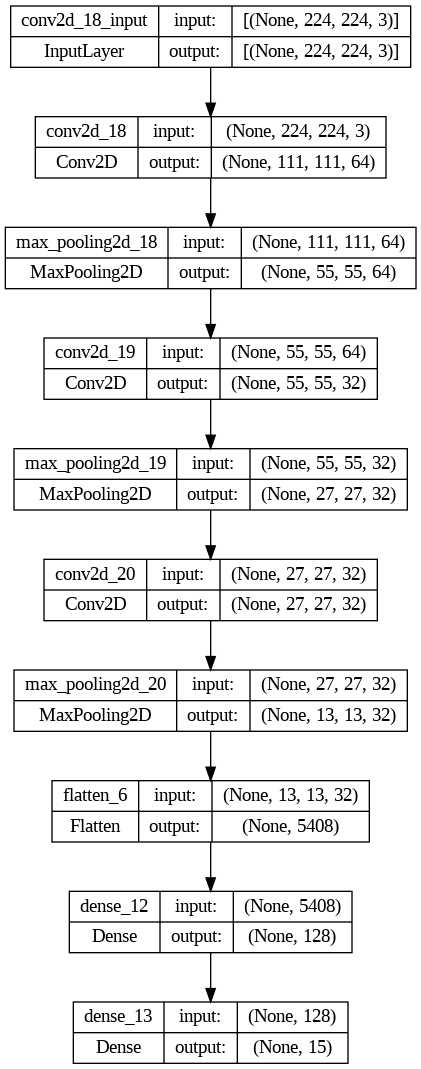

In [99]:
from tensorflow.keras.utils import plot_model

# Plot the model and save it to an image file
plot_model(cnn, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)


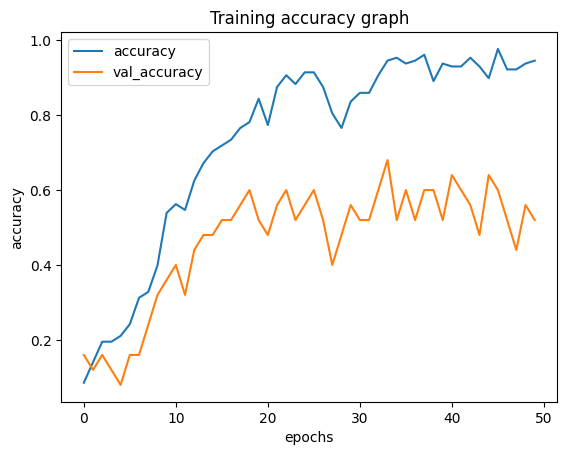

In [100]:
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training accuracy graph')
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

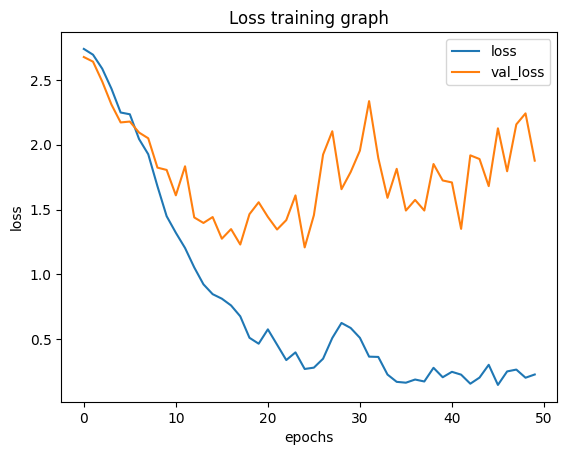

In [101]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss training graph')
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [60]:
# !rm -rf '/content/Test'

In [85]:
# !rm -rf '/content/Train/2Thousandnote'

In [83]:
test_set

In [102]:
test_loss,test_accuracy=cnn.evaluate(test_set)
print('Test Loss: ',test_loss)
print('Test Accuracy: ',test_accuracy)

6/6 [==============================] - 1s 197ms/step - loss: 6.2271 - accuracy: 0.3571
Test Loss:  6.227146148681641
Test Accuracy:  0.3571428656578064


In [103]:
print('Accuracy of the model is : ',test_accuracy*100)

Accuracy of the model is :  35.71428656578064


In [104]:
from tensorflow.keras.preprocessing import image

In [107]:
predicted_result=cnn.predict(test_set)
predicted_result[:5]

6/6 [==============================] - 1s 176ms/step


array([[3.18887703e-15, 2.77639856e-07, 9.99905527e-01, 3.28052082e-12,
        1.10790466e-09, 3.14402641e-05, 2.73274850e-06, 3.71601487e-07,
        7.64285413e-10, 5.85102644e-05, 7.61537777e-11, 8.20229464e-13,
        1.10070494e-06, 6.55163479e-10, 9.61695543e-15],
       [3.30142420e-15, 9.79632735e-01, 9.64194982e-08, 4.17750140e-11,
        1.10367521e-10, 3.54988039e-10, 2.57498305e-05, 1.40556801e-06,
        1.49489360e-05, 1.11582726e-02, 1.15899360e-10, 1.82331998e-08,
        9.16566886e-03, 1.24955511e-06, 2.11514384e-09],
       [1.93724259e-09, 9.76494193e-01, 1.71834356e-04, 8.59534396e-07,
        8.94727748e-07, 2.05440699e-07, 1.23207769e-06, 6.85333274e-04,
        2.02049203e-02, 1.76489528e-03, 5.44399023e-04, 1.06895629e-06,
        1.16101306e-04, 3.83767110e-06, 1.02647646e-05],
       [8.95977303e-12, 2.32288425e-04, 6.07454598e-01, 1.10948076e-06,
        1.65478832e-05, 1.61432460e-01, 2.01869890e-01, 3.24002613e-05,
        1.94813001e-08, 2.89147906e-0

In [108]:
predicted_class=np.argmax(predicted_result,axis=-1)
predicted_class[:5]

array([2, 1, 1, 2, 2])

In [109]:
test_classes=test_set.classes
test_classes

array([ 1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,
        3,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  9,  9,  9,
        9,  9,  9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12,
       12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14],
      dtype=int32)

In [110]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_classes,predicted_class)
print(cm)

[[2 3 0 0 1 0 0 0 0 0 0 0 0 0]
 [2 3 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 3 1 0]
 [0 0 1 1 0 0 0 0 0 0 0 3 1 0]
 [0 0 0 0 4 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 2 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 2 1 0 0 1 0 0]
 [1 0 0 0 1 0 0 2 1 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 2 4 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 4 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 5 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 5 1 0]
 [0 0 0 0 0 0 1 0 0 0 0 1 4 0]
 [0 0 0 0 0 0 1 0 0 0 0 1 4 0]]


<Axes: >

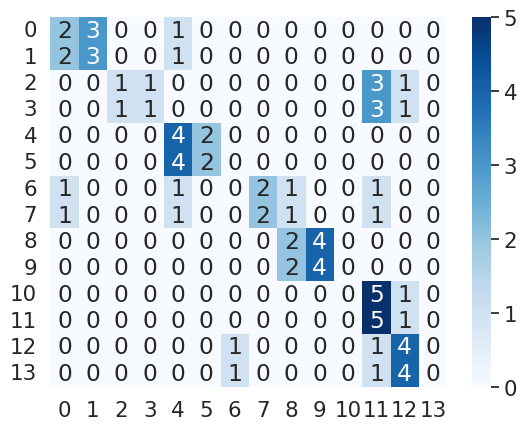

In [111]:
import seaborn as sns
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True,fmt='d',cmap="Blues")

In [112]:
from sklearn.metrics import accuracy_score
print('Accuracy score: ',accuracy_score(test_classes,predicted_class))

Accuracy score:  0.35714285714285715


In [113]:
from sklearn.metrics import classification_report
print('Classification Report \n',classification_report(test_classes,predicted_class))

Classification Report 
               precision    recall  f1-score   support

           1       0.33      0.33      0.33         6
           2       0.50      0.50      0.50         6
           3       0.50      0.17      0.25         6
           4       0.50      0.17      0.25         6
           5       0.33      0.67      0.44         6
           6       0.50      0.33      0.40         6
           7       0.00      0.00      0.00         6
           8       0.50      0.33      0.40         6
           9       0.33      0.33      0.33         6
          10       0.50      0.67      0.57         6
          11       0.00      0.00      0.00         6
          12       0.25      0.83      0.38         6
          13       0.33      0.67      0.44         6
          14       0.00      0.00      0.00         6

    accuracy                           0.36        84
   macro avg       0.33      0.36      0.31        84
weighted avg       0.33      0.36      0.31        84



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [114]:
export_path_keras = "/content/Model/Model_2_SVM_with_CNN.h5"
print(export_path_keras)
cnn.save(export_path_keras)

/content/Model/Model_2_SVM_with_CNN.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [115]:
from tensorflow.keras.models import load_model

In [116]:
model_path=export_path_keras
reload_model=load_model(model_path)
reload_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 111, 111, 64)      1792      
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 55, 55, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 55, 55, 32)        18464     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 27, 27, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 27, 27, 32)        9248      
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 13, 13, 32)       

In [117]:
print(len(reload_model.weights))
print(reload_model.output_shape)

10
(None, 15)


In [118]:
reload_model.layers

In [119]:
!pip install pyttsx3

In [120]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import PIL
import glob
import pyttsx3
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [121]:
export_path_keras = '/content/model/1.CNN1.h5'

In [122]:
print(export_path_keras)
cnn.save(export_path_keras)

/content/model/1.CNN1.h5


In [123]:
MODELPATH=export_path_keras
reload_model=load_model(MODELPATH)
reload_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 111, 111, 64)      1792      
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 55, 55, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 55, 55, 32)        18464     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 27, 27, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 27, 27, 32)        9248      
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 13, 13, 32)       

In [124]:
predicted_result=reload_model.predict(test_set)
predicted_result[:5]

6/6 [==============================] - 2s 271ms/step


array([[3.18887703e-15, 2.77639856e-07, 9.99905527e-01, 3.28052082e-12,
        1.10790466e-09, 3.14402641e-05, 2.73274850e-06, 3.71601487e-07,
        7.64285413e-10, 5.85102644e-05, 7.61537777e-11, 8.20229464e-13,
        1.10070494e-06, 6.55163479e-10, 9.61695543e-15],
       [3.30142420e-15, 9.79632735e-01, 9.64194982e-08, 4.17750140e-11,
        1.10367521e-10, 3.54988039e-10, 2.57498305e-05, 1.40556801e-06,
        1.49489360e-05, 1.11582726e-02, 1.15899360e-10, 1.82331998e-08,
        9.16566886e-03, 1.24955511e-06, 2.11514384e-09],
       [1.93724259e-09, 9.76494193e-01, 1.71834356e-04, 8.59534396e-07,
        8.94727748e-07, 2.05440699e-07, 1.23207769e-06, 6.85333274e-04,
        2.02049203e-02, 1.76489528e-03, 5.44399023e-04, 1.06895629e-06,
        1.16101306e-04, 3.83767110e-06, 1.02647646e-05],
       [8.95977303e-12, 2.32288425e-04, 6.07454598e-01, 1.10948076e-06,
        1.65478832e-05, 1.61432460e-01, 2.01869890e-01, 3.24002613e-05,
        1.94813001e-08, 2.89147906e-0

In [125]:
predicted_class=np.argmax(predicted_result,axis=-1)
predicted_class[:5]

array([2, 1, 1, 2, 2])

In [126]:
test_classes=test_set.classes
test_classes

array([ 1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,
        3,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  9,  9,  9,
        9,  9,  9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12,
       12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14],
      dtype=int32)

In [127]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_classes,predicted_class)
print(cm)

[[2 3 0 0 1 0 0 0 0 0 0 0 0 0]
 [2 3 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 3 1 0]
 [0 0 1 1 0 0 0 0 0 0 0 3 1 0]
 [0 0 0 0 4 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 2 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 2 1 0 0 1 0 0]
 [1 0 0 0 1 0 0 2 1 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 2 4 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 4 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 5 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 5 1 0]
 [0 0 0 0 0 0 1 0 0 0 0 1 4 0]
 [0 0 0 0 0 0 1 0 0 0 0 1 4 0]]


<Axes: >

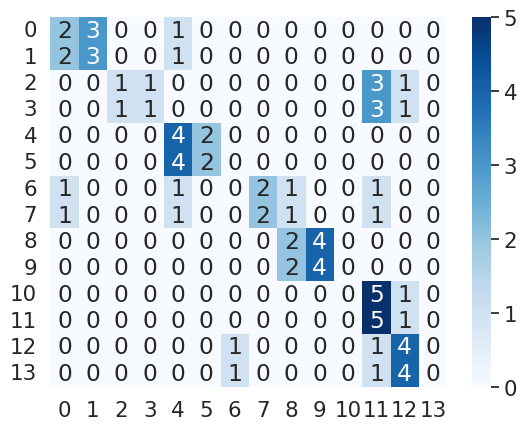

In [128]:
import seaborn as sns
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True,fmt='d',cmap="Blues")

In [129]:
from sklearn.metrics import accuracy_score
print('Accuracy score: ',accuracy_score(test_classes,predicted_class))

Accuracy score:  0.35714285714285715


In [130]:
from sklearn.metrics import classification_report
print('Classification Report \n',classification_report(test_classes,predicted_class))

Classification Report 
               precision    recall  f1-score   support

           1       0.33      0.33      0.33         6
           2       0.50      0.50      0.50         6
           3       0.50      0.17      0.25         6
           4       0.50      0.17      0.25         6
           5       0.33      0.67      0.44         6
           6       0.50      0.33      0.40         6
           7       0.00      0.00      0.00         6
           8       0.50      0.33      0.40         6
           9       0.33      0.33      0.33         6
          10       0.50      0.67      0.57         6
          11       0.00      0.00      0.00         6
          12       0.25      0.83      0.38         6
          13       0.33      0.67      0.44         6
          14       0.00      0.00      0.00         6

    accuracy                           0.36        84
   macro avg       0.33      0.36      0.31        84
weighted avg       0.33      0.36      0.31        84



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [131]:
!pip install playsound

  Preparing metadata (setup.py) ... done
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7020 sha256=f665935a29d1f05ece6d9b306aba10b19c780337e2e315636eb5fd845b6aedb0
  Stored in directory: /root/.cache/pip/wheels/90/89/ed/2d643f4226fc8c7c9156fc28abd8051e2d2c0de37ae51ac45c
Successfully built playsound


In [132]:
import os
import pyttsx3
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import time
import PIL
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from playsound import playsound
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [133]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [134]:
checkpointer = ModelCheckpoint(filepath=MODELPATH+'1.CNN1.h5', verbose=1, save_best_only=True)


In [138]:
print(export_path_keras)
cnn.save(export_path_keras)

content/model/1.CNN1.h5


In [139]:

export_path_keras = 'content/model/1.CNN1.h5'
MODELPATH=export_path_keras
reload_model=load_model(MODELPATH)
reload_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 111, 111, 64)      1792      
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 55, 55, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 55, 55, 32)        18464     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 27, 27, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 27, 27, 32)        9248      
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 13, 13, 32)       

{'.ipynb_checkpoints': 0,
 '1Hundrednote_Fake': 1,
 '1Hundrednote_Real': 2,
 '2Hundrednote_Fake': 3,
 '2Hundrednote_Real': 4,
 '2Thousandnote_Fake': 5,
 '2Thousandnote_Real': 6,
 '5Hundrednote_Fake': 7,
 '5Hundrednote_Real': 8,
 'Fiftynote_Fake': 9,
 'Fiftynote_Real': 10,
 'Tennote_Fake': 11,
 'Tennote_Real': 12,
 'Twentynote_Fake': 13,
 'Twentynote_Real': 14}


In [150]:
def noteclass(cls):
    txt=pyttsx3.init()
    # if cls==0:
    #     ans="Two Taka"
    #     print(ans)
    #     txt.say(ans)
    #     txt.runAndWait()
    # el
    if cls==1:
        ans="1Hundrednote and Fake Authentic note"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==2:
        ans="1Hundrednote and Fake Authentic note"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==3:
        ans="2Hundrednote_Fake"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==4:
        ans="2Hundrednote_Real"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==5:
        ans="2Thousandnote_Fake"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==6:
        ans="2Thousandnote_Real"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==7:
        ans="5Hundrednote_Fake"
        print(ans)
        txt.say(ans)
        txt.runAndWait()

    elif cls==8:
        ans="5Hundrednote_Real"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==9:
        ans="Fiftynote_Fake"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==10:
        ans="Fiftynote_Real"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==11:
        ans="Tennote_Fake"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==12:
        ans="Tennote_Real"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==13:
        ans="Twentynote_Fake"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==14:
        ans="Twentynote_Real"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    else:
        ans="Fake Note"
        print(ans)
        txt.say(ans)
        txt.runAndWait()


In [141]:
!pip install pyttsx3

In [142]:
!sudo apt-get install espeak

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  espeak-data libespeak1 libportaudio2 libsonic0
The following NEW packages will be installed:
  espeak espeak-data libespeak1 libportaudio2 libsonic0
0 upgraded, 5 newly installed, 0 to remove and 45 not upgraded.
Need to get 1,382 kB of archives.
After this operation, 3,178 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudio2 amd64 19.6.0-1.1 [65.3 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libsonic0 amd64 0.2.0-11build1 [10.3 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 espeak-data amd64 1.48.15+dfsg-3 [1,085 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libespeak1 amd64 1.48.15+dfsg-3 [156 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy/universe amd64 espeak amd64 1.48.15+dfsg-3 [64.2 kB]
Fetched 1,382 kB in 0s (9,980 

In [143]:
!ldconfig -p | grep libespeak.so.1

	libespeak.so.1 (libc6,x86-64) => /lib/x86_64-linux-gnu/libespeak.so.1


1/1 [==============================] - 0s 26ms/step
Fiftynote_Fake


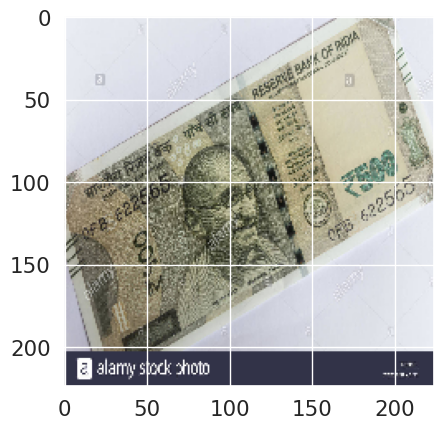

In [151]:
#""WIN_20220326_11_18_21_Pro"""
random_image=image.load_img('/content/Test/5Hundrednote_Real/33.jpg',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
#print(test_image.shape)
predicted_class=reload_model.predict(test_image)
#print(predicted_class)
#print('True classification')
noteclass(np.argmax(predicted_class))

1/1 [==============================] - 0s 26ms/step
2Thousandnote_Fake


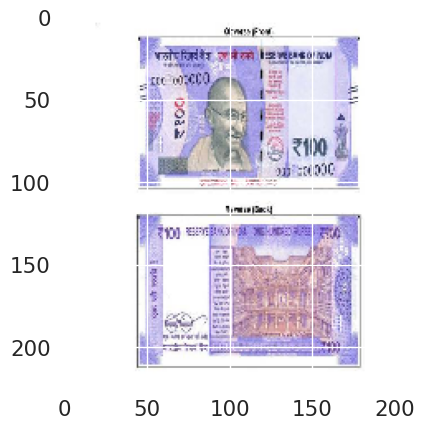

In [152]:
#""E:\AThesis\anotation\anotated img\2\21493.png"""
random_image=image.load_img('/content/Test/1Hundrednote_Real/3.jpg',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
#print(test_image.shape)
predicted_class=reload_model.predict(test_image)
#print(predicted_class)
#print('True classification')
noteclass(np.argmax(predicted_class))


1/1 [==============================] - 0s 24ms/step
Tennote_Real


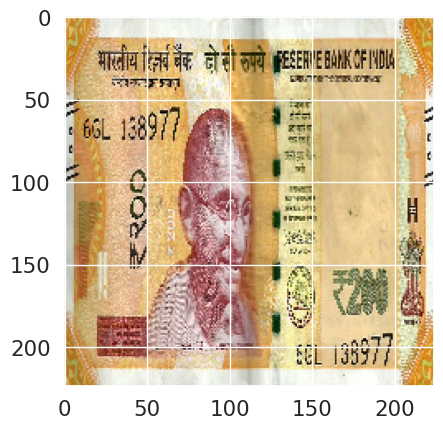

In [153]:
random_image=image.load_img('/content/Test/2Hundrednote_Real/2.jpg',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
#print(test_image.shape)
predicted_class=reload_model.predict(test_image)
#print(predicted_class)
#print('True classification')
noteclass(np.argmax(predicted_class))

1/1 [==============================] - 0s 71ms/step
2Thousandnote_Fake


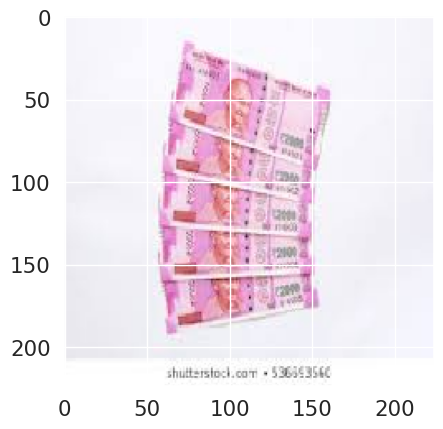

In [155]:
random_image=image.load_img('/content/Test/2Thousandnote_Real/32.jpg',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
#print(test_image.shape)
predicted_class=reload_model.predict(test_image)
noteclass(np.argmax(predicted_class))
#print('True classification')

1/1 [==============================] - 0s 44ms/step
Fiftynote_Fake


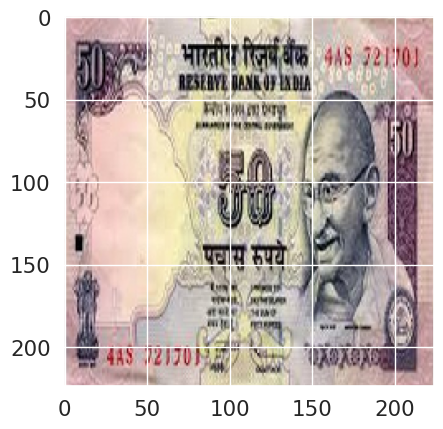

In [156]:
#""WIN_20220326_11_18_21_Pro"""
random_image=image.load_img('/content/Test/Fiftynote_Real/28.jpg',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
#print(test_image.shape)
predicted_class=reload_model.predict(test_image)
#print(predicted_class)
#print('True classification')
noteclass(np.argmax(predicted_class))

1/1 [==============================] - 0s 106ms/step
Twentynote_Fake


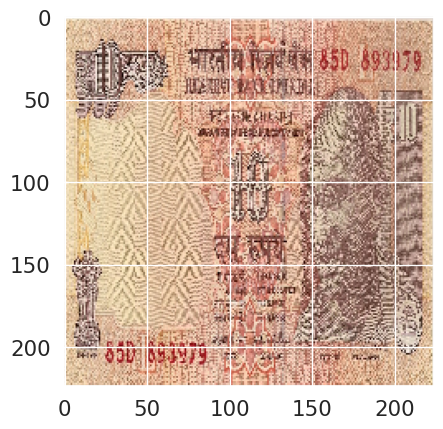

In [157]:

#""WIN_20220326_11_18_21_Pro"""
random_image=image.load_img('/content/Test/Tennote_Real/3.jpg',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
#print(test_image.shape)
predicted_class=reload_model.predict(test_image)
#print(predicted_class)
#print('True classification')
noteclass(np.argmax(predicted_class))

In [158]:
#prediction
pred=reload_model.predict(test_image)
print(pred)

1/1 [==============================] - 0s 24ms/step
[[7.3160268e-22 1.4610146e-09 8.6077706e-10 1.1969466e-04 3.9760511e-05
  7.0716897e-07 1.5614945e-05 2.4406413e-10 9.1003614e-14 8.3917556e-03
  1.2993191e-17 4.9474780e-03 3.7178467e-03 9.8276722e-01 4.4516248e-12]]


In [159]:
#since it is a binary classification

if pred[0][0]>0.5:
    print("real")
else:
    print("fake")

fake
